<a href="https://colab.research.google.com/github/TechPaulFrey/-My-Website/blob/main/Revenue_Forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [ ]:
rev_data = pd.read_csv("rev_data.csv")


In [ ]:
rev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     28 non-null     object 
 1   Revenue  28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes


converting date from object datatype to DateType datatype

In [ ]:
rev_data['Date'] = pd.to_datetime(rev_data['Date'])
rev_data.set_index('Date', inplace=True)

In [ ]:
for lag in range(1, 13):
    rev_data[f'lag_{lag}'] = rev_data['Revenue'].shift(lag)

In [ ]:
rev_data = rev_data.dropna()

In [ ]:
X = rev_data.drop(['Revenue'], axis=1)
y = rev_data['Revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=2, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

In [ ]:
last_date = rev_data.index[-1]
future_dates = pd.date_range(last_date, periods=6, freq='MS')[1:]

In [ ]:
future_df = pd.DataFrame(index=future_dates)
for lag in range(1, 13):
    future_df[f'lag_{lag}'] = rev_data['Revenue'].shift(lag).tail(len(future_dates)).values

In [ ]:
future_predictions = model.predict(future_df)

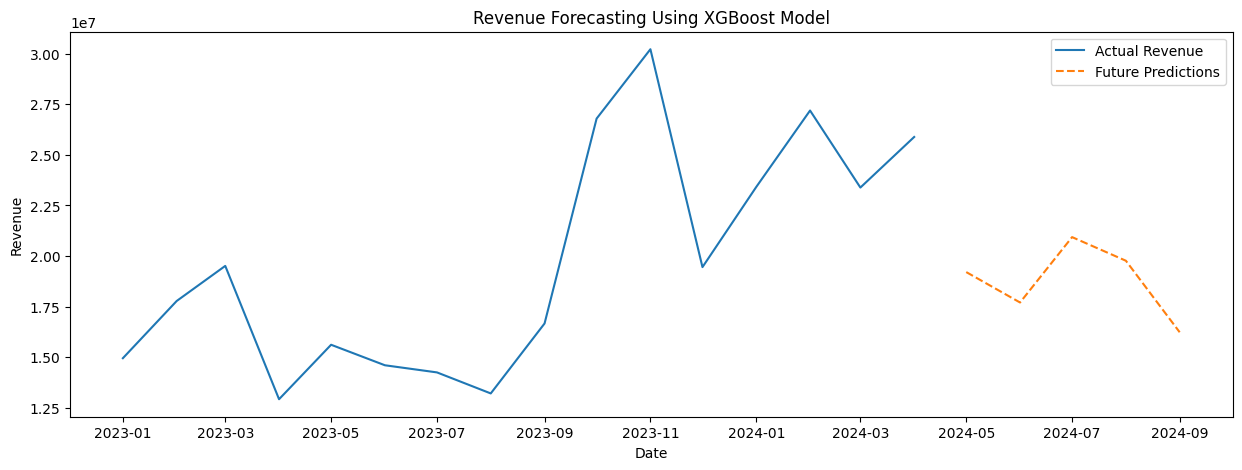

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(rev_data.index, rev_data['Revenue'], label='Actual Revenue')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title("Revenue Forecasting Using XGBoost Model")
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [ ]:
print("Mean Squared Error:", xgb_mse)
print("Mean Absolute Error:", xgb_mae)
print("R-squared:", xgb_r2)
print("Future Predictions:", future_predictions)

Mean Squared Error: 44559730826260.875
Mean Absolute Error: 6313343.824999999
R-squared: -15.627148641819499
Future Predictions: [19202732. 17698080. 20932102. 19763338. 16226675.]
